In [45]:
import numpy as np
import pandas as pd

In [58]:
df=pd.read_csv('D:\gc\AccidentsBig.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_33368\1933641957.py:1: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('D:\gc\AccidentsBig.csv')


In [59]:
df.head()

,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018


In [60]:
len(df)

1048575

In [61]:
df.dropna(inplace=True)

In [62]:
len(df)

59900

In [65]:
asg = np.random.randint(0, 7, size=len(df))
df["Accident_Severity"]=asg

In [66]:
import pandas as pd
import folium
from folium.plugins import HeatMap


# Create a map centered around a location of your choice
map_obj = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Convert the DataFrame into a list of lists (latitude, longitude, intensity)
heat_data = df[['latitude', 'longitude', 'Accident_Severity']].values.tolist()

# Add heatmap layer
HeatMap(heat_data).add_to(map_obj)

# Save the map to an HTML file
map_obj.save("heatmap.html")

# Display the map
map_obj


In [51]:
df_new = df.copy()

In [52]:
from sklearn import preprocessing


features = [ 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Carriageway_Hazards', 'Urban_or_Rural_Area']


scaler = preprocessing.StandardScaler()

scaler.fit(df_new[features])


df_new[features] = scaler.transform(df_new[features])


df_new.head(-5)

,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,-1.200858,-0.420814,3.0,17:42,12.0,...,0.075307,-0.606913,0.484049,1.294032,0.0,-0.099711,-0.475555,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,-1.200858,-0.420814,4.0,17:36,12.0,...,2.183929,1.411339,-0.305047,-0.550714,0.0,-0.099711,-0.475555,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,0.243229,-0.420814,5.0,00:15,12.0,...,-0.451849,1.411339,-0.305047,-0.550714,0.0,-0.099711,-0.475555,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,-1.200858,-0.420814,6.0,10:35,12.0,...,-0.451849,-0.606913,-0.305047,-0.550714,0.0,-0.099711,-0.475555,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,-1.200858,-0.420814,2.0,21:13,12.0,...,-0.451849,3.429591,-0.305047,1.294032,0.0,-0.099711,-0.475555,1.0,E01002863,10-01-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59988,59989.0,87.982137,16.866721,12.0,3.0,0.243229,-0.420814,2.0,19:00,184.0,...,-0.451849,-0.606913,-0.305047,-0.550714,0.0,-0.099711,2.102807,2.0,E01027755,27-06-2018
59989,59990.0,69.275310,21.350255,12.0,3.0,-1.200858,-0.420814,3.0,17:45,189.0,...,3.765396,-0.606913,-0.305047,-0.550714,0.0,-0.099711,-0.475555,2.0,E01013368,28-06-2018
59990,59991.0,78.792250,15.863854,12.0,2.0,0.243229,-0.420814,3.0,18:52,181.0,...,-0.451849,-0.606913,-0.305047,-0.550714,0.0,-0.099711,2.102807,1.0,E01027617,28-06-2018
59991,59992.0,79.168825,28.668766,12.0,2.0,0.243229,-0.420814,3.0,20:00,181.0,...,-0.451849,-0.606913,-0.305047,-0.550714,0.0,-0.099711,2.102807,1.0,E01027603,28-06-2018


In [53]:
df_new[features].values

array([[-1.20085796, -0.42081411, -0.44103434, ...,  1.29403201,
        -0.09971063, -0.4755549 ],
       [-1.20085796, -0.42081411, -0.44103434, ..., -0.55071351,
        -0.09971063, -0.4755549 ],
       [ 0.24322852, -0.42081411, -0.44103434, ..., -0.55071351,
        -0.09971063, -0.4755549 ],
       ...,
       [ 0.24322852, -0.42081411,  2.17823565, ..., -0.55071351,
        -0.09971063,  2.10280665],
       [ 1.687315  ,  0.8919015 ,  2.17823565, ..., -0.55071351,
        -0.09971063,  2.10280665],
       [ 0.24322852,  0.8919015 , -0.44103434, ...,  1.29403201,
        -0.09971063,  2.10280665]])

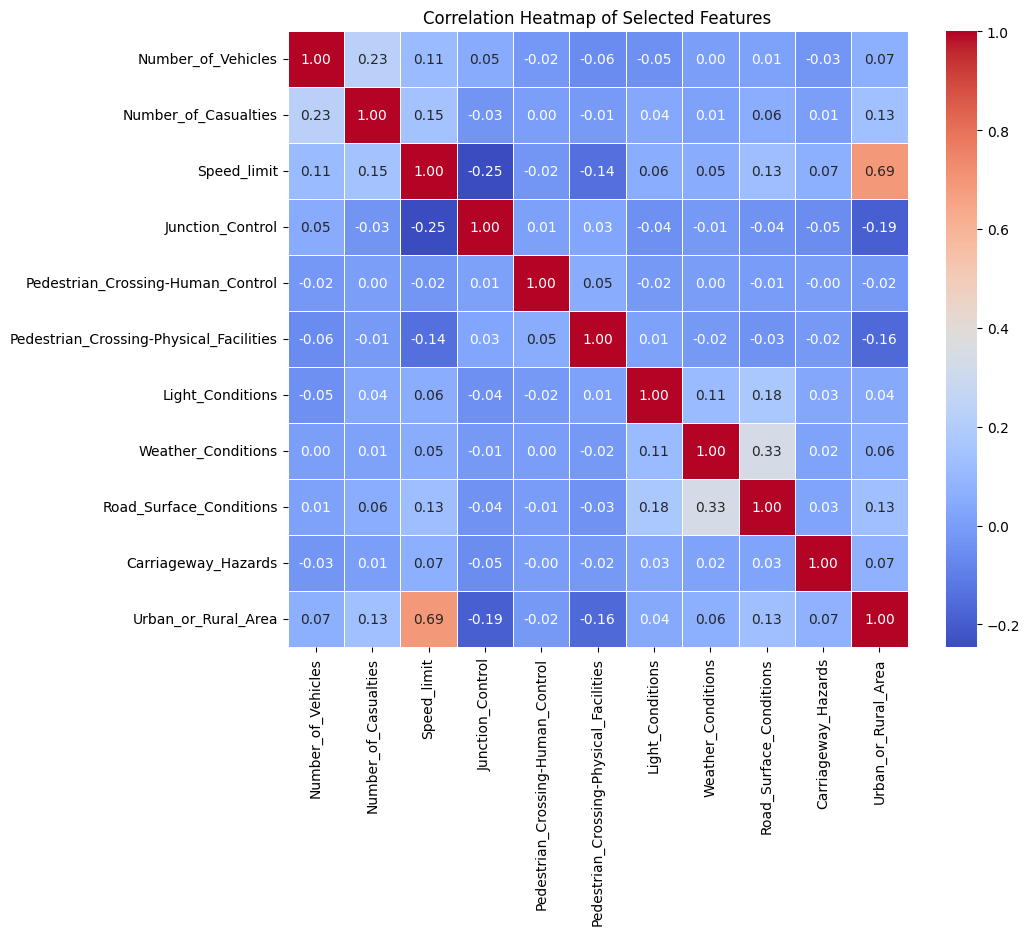

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for which you want to plot the correlation heatmap
selected_features = ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', 'Junction_Control', 
                     'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
                     'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
                     'Carriageway_Hazards', 'Urban_or_Rural_Area']

# Select the data containing only the selected features
data_selected = df_new[selected_features]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


In [69]:
import numpy as np
import pandas as pd

def calculate_membership(data, centroids, fuzziness):
    distances = np.linalg.norm(data[:, None, :] - centroids[None, :, :], axis=2) ** (2 / (fuzziness - 1))
    return 1 / distances

def update_centroids(data, membership, fuzziness):
    membership_powered = membership ** fuzziness
    centroids = np.dot(membership_powered.T, data) / np.sum(membership_powered, axis=0)[:, None]
    return centroids

def fcm(data, n_clusters, fuzziness=2, max_iter=100, threshold=1e-5):
   
    centroids = np.random.rand(n_clusters, data.shape[1])

    for _ in range(max_iter):
        
        membership = calculate_membership(data, centroids, fuzziness)

       
        centroids_new = update_centroids(data, membership, fuzziness)

        if np.linalg.norm(centroids_new - centroids) < threshold:
            break

        centroids = centroids_new

  
    cluster_membership = np.argmax(membership, axis=1)

    return centroids, cluster_membership


np.random.seed(42)
data = df_new[features].values  
n_clusters = 2  # Number of clusters

centroids, cluster_membership = fcm(data, n_clusters)


print("Cluster Centers:")
print(centroids)



Cluster Centers:
[[ 0.24322852 -0.42081411 -0.44103434  0.88017445 -0.06045581 -0.45184888
  -0.60691326 -0.3050466  -0.55071351 -0.09971063 -0.4755549 ]
 [ 0.2432285  -0.42081409 -0.44103433  0.8801744  -0.06045581 -0.45184882
  -0.60691325 -0.3050466  -0.5507135  -0.09971063 -0.47555489]]

Membership values for Cluster 0:
Data points: [17 34 40 56 57]
Membership values:
Data point 17: 0
Data point 34: 0
Data point 40: 0
Data point 56: 0
Data point 57: 0

Membership values for Cluster 1:
Data points: [0 1 2 3 4]
Membership values:
Data point 0: 1
Data point 1: 1
Data point 2: 1
Data point 3: 1
Data point 4: 1


In [77]:
df_with_clusters = df_new.copy()  # Make a copy of the original DataFrame

# Add the cluster labels as a new column
df_with_clusters['Cluster_Labels'] = cluster_membership

# Print the updated DataFrame
selected_columns = ['Accident_Index', 'Cluster_Labels']  # Replace 'Column1' and 'Column2' with the names of the columns you want to display

# Display only the selected columns
df_selected_columns = df_with_clusters[selected_columns]
df_selected_columns.head()


,Accident_Index,Cluster_Labels
0,1.0,1
1,2.0,1
2,3.0,1
3,4.0,1
4,5.0,1


In [68]:
from sklearn.metrics import silhouette_score



silhouette_avg = silhouette_score(data, cluster_membership)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.0655462101395817


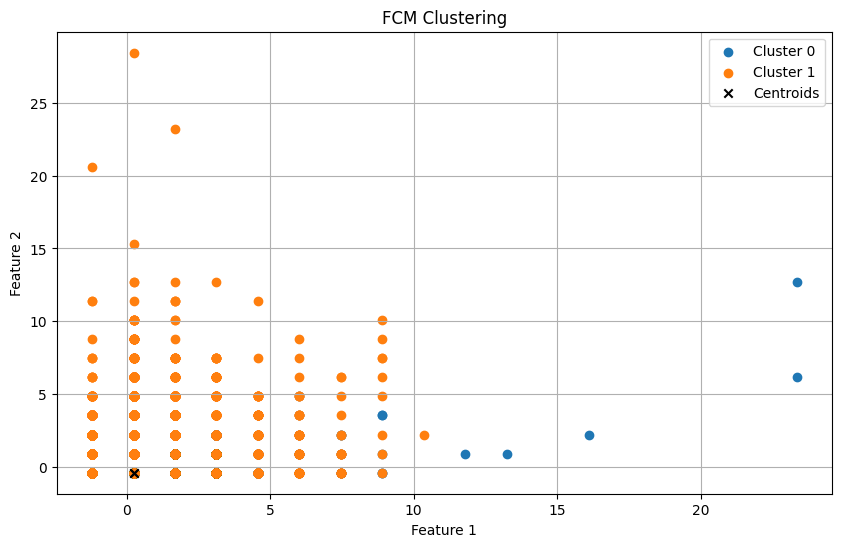

In [55]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plot data points
for cluster_label in range(n_clusters):
    plt.scatter(data[cluster_membership == cluster_label, 0],  # X-axis
                data[cluster_membership == cluster_label, 1],  # Y-axis
                label=f'Cluster {cluster_label}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')

plt.title('FCM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
